<h1>Stroke Prediction Dataset</h1>

<h2>Import Data</h2>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<h2>Handle NaN Data</h2>

In [4]:
df.fillna(df.median(), inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h2>Normalization</h2>

In [5]:
columns = ['age', 'avg_glucose_level', 'bmi']

In [6]:
for column in columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.816895,0,1,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
1,Female,0.743652,0,0,Yes,Self-employed,Rural,0.679023,0.203895,never smoked,1
2,Male,0.975586,0,1,Yes,Private,Rural,0.234512,0.254296,never smoked,1
3,Female,0.597168,0,0,Yes,Private,Urban,0.536008,0.276060,smokes,1
4,Female,0.963379,1,0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1


<h2>One-Hot Encoding</h2>

In [7]:
cleanup = {
    "hypertension": {
        0: "no",
        1: "yes"
    },
    "heart_disease": {
        0: "no",
        1: "yes"
    }
}

In [8]:
df.replace(cleanup, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.816895,no,yes,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
1,Female,0.743652,no,no,Yes,Self-employed,Rural,0.679023,0.203895,never smoked,1
2,Male,0.975586,no,yes,Yes,Private,Rural,0.234512,0.254296,never smoked,1
3,Female,0.597168,no,no,Yes,Private,Urban,0.536008,0.276060,smokes,1
4,Female,0.963379,yes,no,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1


In [9]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,hypertension_yes,heart_disease_yes,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.801265,0.301260,1,1,0,0,1,1,0,1,0,0,1,1,0,0
1,0.743652,0.679023,0.203895,1,0,0,0,0,1,0,0,1,0,0,0,1,0
2,0.975586,0.234512,0.254296,1,1,0,0,1,1,0,1,0,0,0,0,1,0
3,0.597168,0.536008,0.276060,1,0,0,0,0,1,0,1,0,0,1,0,0,1
4,0.963379,0.549349,0.156930,1,0,0,1,0,1,0,0,1,0,0,0,1,0


<h2>Balancing the Dataset</h2>

In [10]:
train = df.sample(frac=0.8, random_state=1)
test = df.drop(train.index)

In [11]:
train['stroke'].value_counts()

0    3889
1     199
Name: stroke, dtype: int64

In [12]:
test['stroke'].value_counts()

0    972
1     50
Name: stroke, dtype: int64

In [13]:
columns = df.columns.to_list()[ 4 : ]

<h2>Create the Train Model</h2>

In [14]:
from crucio import ADASYN, SMOTE, SMOTETOMEK
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
algorithms = [ADASYN, SMOTE, SMOTETOMEK]
titles = ['ADASYN', 'SMOTE', 'SMOTETOMEK']

X_test = test.drop('stroke', axis=1)
y_test = test['stroke']

ADASYN:
0    3889
1     424
Name: stroke, dtype: int64
SMOTE:
0    3889
1    3889
Name: stroke, dtype: int64
SMOTETOMEK:
1    3889
0    3714
Name: stroke, dtype: int64


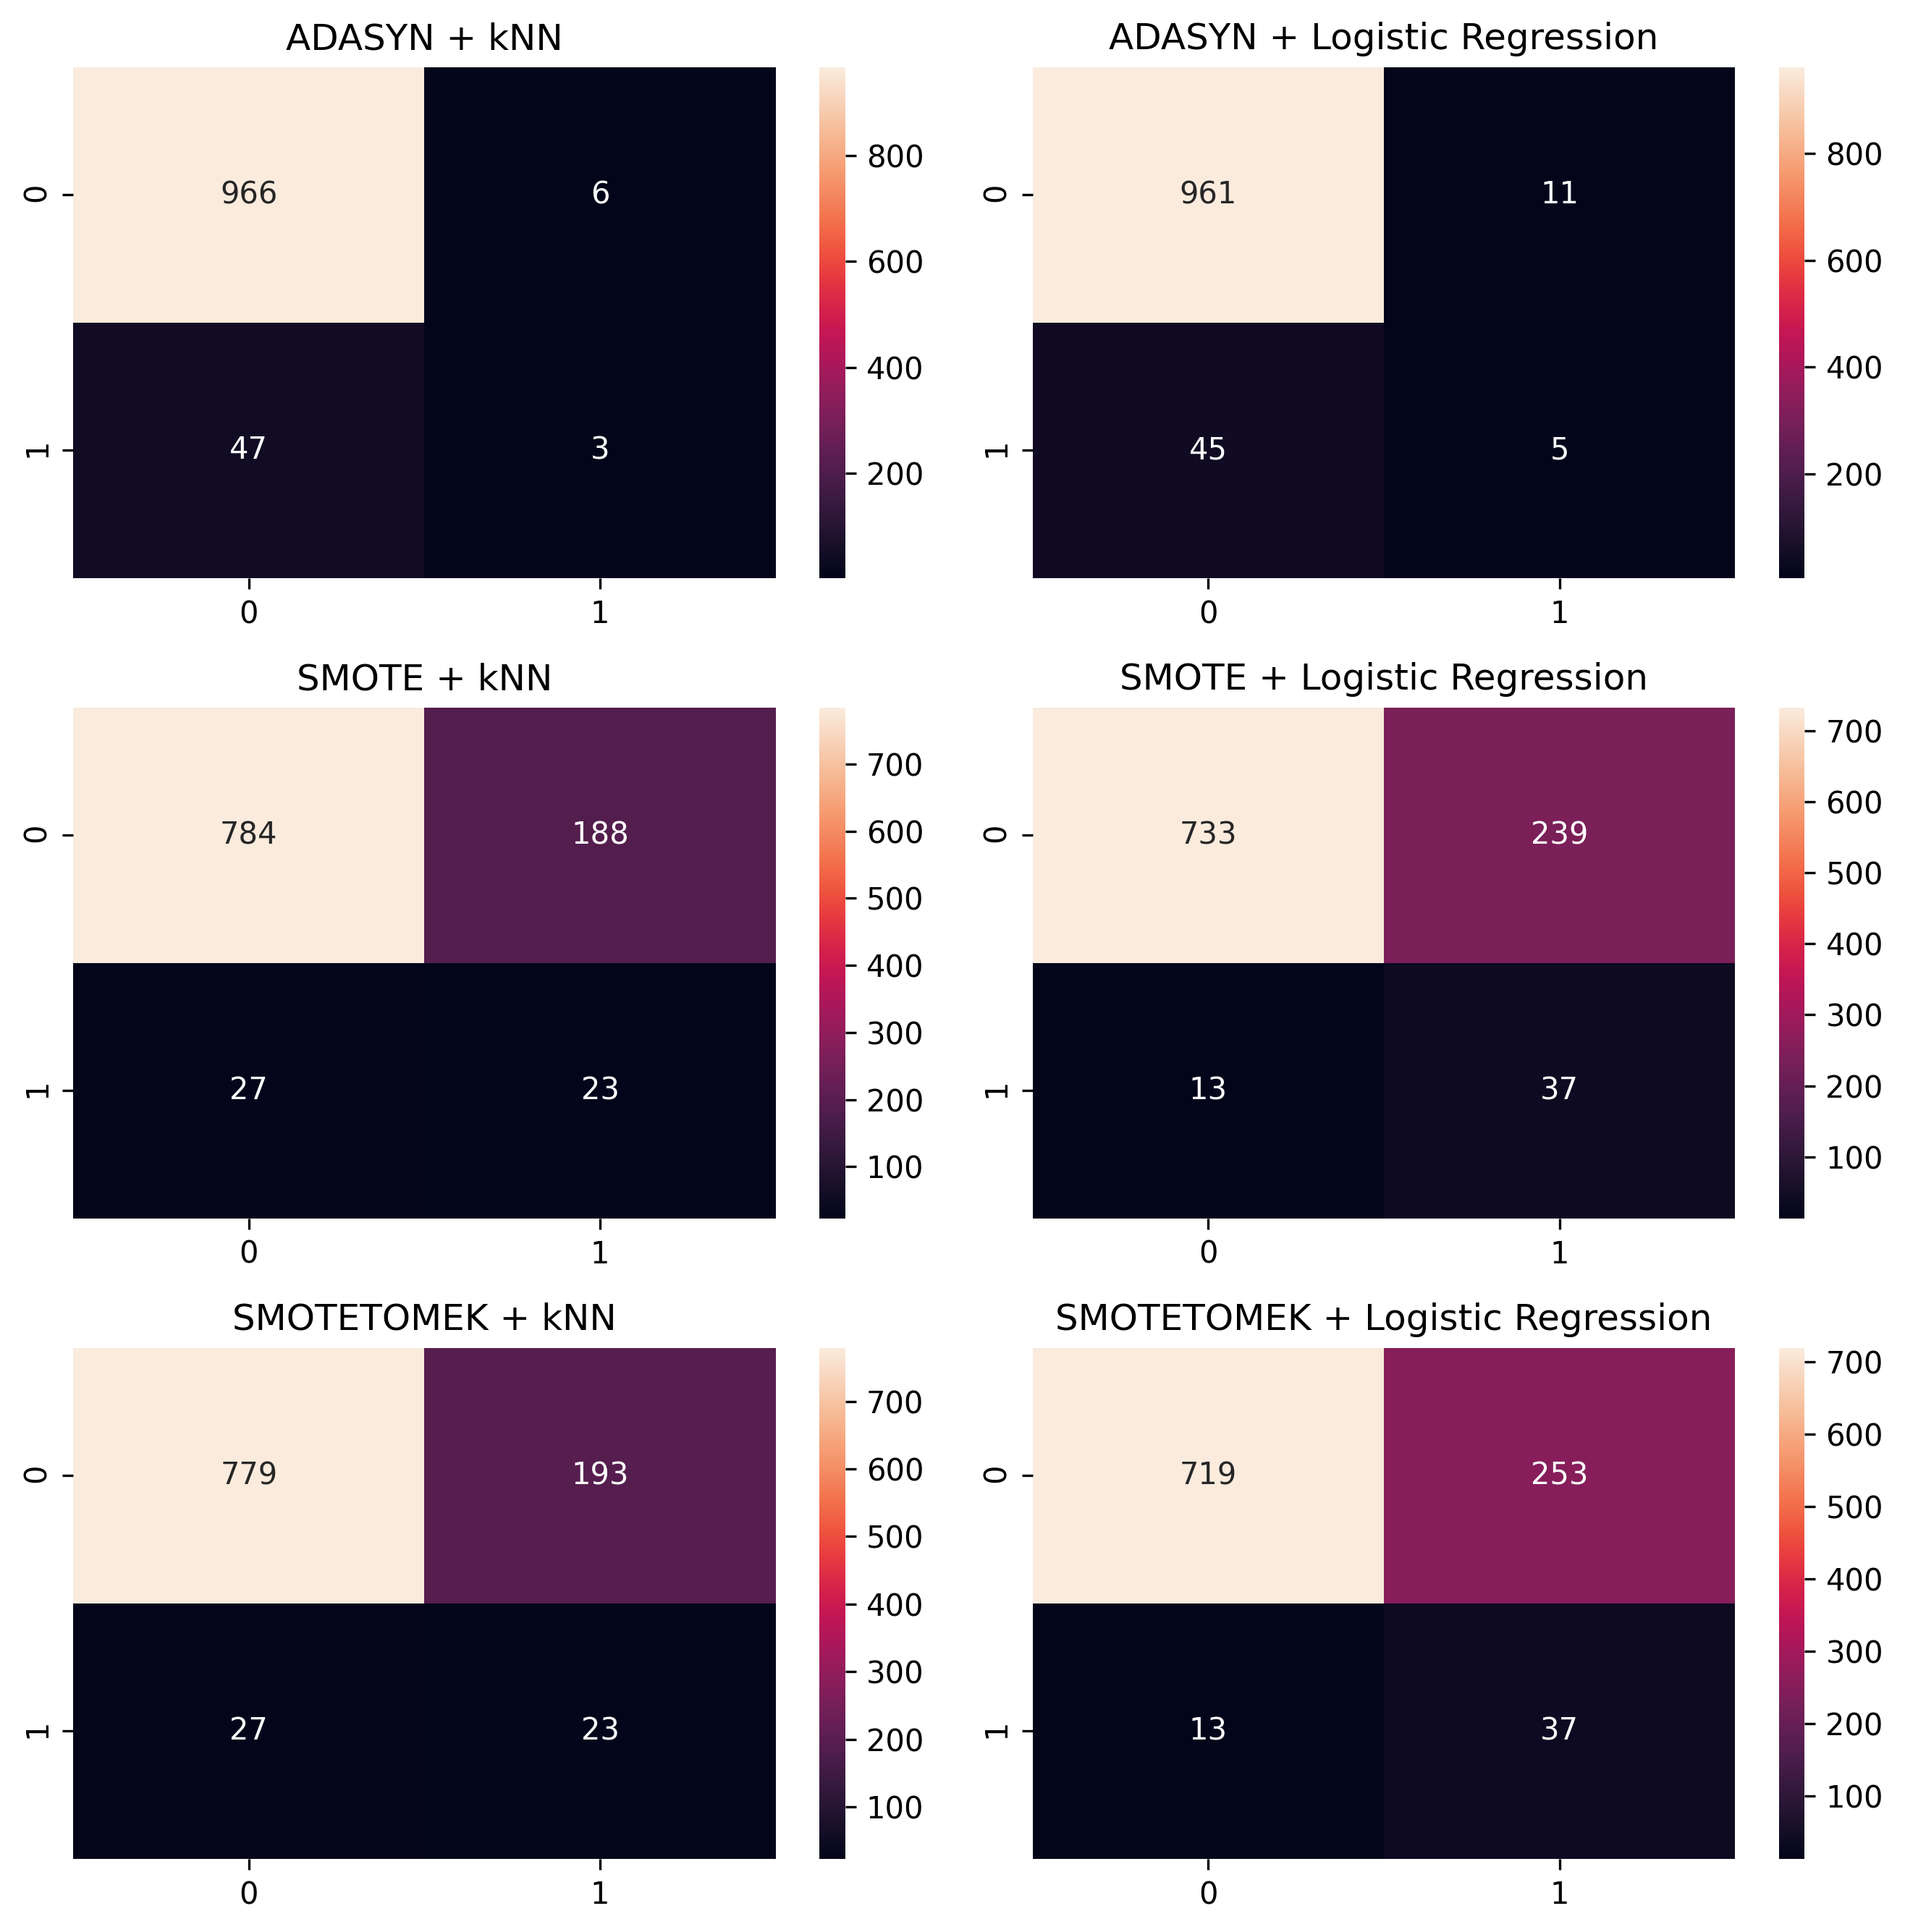

In [21]:
fig = plt.figure(figsize=(9, 9), dpi=300)

for index, algorithm in enumerate(algorithms):
    a = algorithm(binary_columns=columns)
    t = a.balance(train, 'stroke')
    
    print(titles[index] + ':')
    print(t['stroke'].value_counts())
    
    X_train = t.drop('stroke', axis=1)
    y_train = t['stroke']
    
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    ax = fig.add_subplot(320 + index*2 + 1)
    sns.heatmap(
        confusion_matrix(y_test, y_pred), 
        annot=True, fmt='g', ax=ax
    ).set_title(titles[index] + ' + kNN')

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)
    
    ax = fig.add_subplot(320 + index*2 + 2)
    sns.heatmap(
        confusion_matrix(y_test, y_pred), 
        annot=True, fmt='g', ax=ax
    ).set_title(titles[index] + ' + Logistic Regression')

plt.tight_layout()

<p>Based on these confusion matrices I believe that SMOTE + Logistic Regression did the best job.</p>